In [1]:
import ibm_db

In [2]:
# Connect to Db2 database on Cloud using Python
dsn_hostname = "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "******"        # e.g. "abc12345"
dsn_pwd = "*********"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"


In [3]:
#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)


In [4]:
#Create database connection
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database)
except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )


Connected to database:  BLUDB


In [5]:
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [6]:
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           libdb2.a
DRIVER_VER:            11.05.0400
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1208
CONN_CODEPAGE:         1208


In [7]:
# Access DB2 on Cloud using Python
# Create a table in the database
dropQuery = "drop table INSTRUCTOR"
dropStmt = ibm_db.exec_immediate(conn, dropQuery)


In [8]:
createQuery = 'create table instructor (id integer primary key not null,\
fname varchar(20),\
lname varchar(20),\
city varchar(20),\
ccode char(2));'
createStmt = ibm_db.exec_immediate(conn, createQuery)


In [9]:
# insert statement
insert1 = """insert into instructor (id, fname, lname, city, ccode)\
values (1, 'Mary', 'Lou', 'NYC', 'US');"""

insertStmt1 = ibm_db.exec_immediate(conn, insert1)

insert2 = """insert into instructor values \
(2, 'Lucy', 'Ruby', 'Buffalo', 'US'), \
(3, 'Nancy', 'Forest', 'Mooncity', 'CA');"""
insertStmt2 = ibm_db.exec_immediate(conn, insert2)


In [10]:
# select query
select1 = 'select * from instructor;'
selectStmt1 = ibm_db.exec_immediate(conn, select1)

# retrieve all rows
row = ibm_db.fetch_tuple(selectStmt1)
data = []
while row:
    data.append(row)
    row = ibm_db.fetch_tuple(selectStmt1)
print(data)

[(1, 'Mary', 'Lou', 'NYC', 'US'), (2, 'Lucy', 'Ruby', 'Buffalo', 'US'), (3, 'Nancy', 'Forest', 'Mooncity', 'CA')]


In [11]:
# update stm
update1 = "update instructor set CITY = 'Silver city' where Ucase(FNAME) = 'NANCY';"

updateStmt1 = ibm_db.exec_immediate(conn, update1)

select2 = 'select * from instructor;'
selectStmt2 = ibm_db.exec_immediate(conn, select2)
retr = ibm_db.fetch_tuple(selectStmt2)
while retr:
    print(retr)
    retr = ibm_db.fetch_tuple(selectStmt2)

(1, 'Mary', 'Lou', 'NYC', 'US')
(2, 'Lucy', 'Ruby', 'Buffalo', 'US')
(3, 'Nancy', 'Forest', 'Silver city', 'CA')


In [12]:
# retrieve data into pandas
import pandas as pd
import ibm_db_dbi

pconn = ibm_db_dbi.Connection(conn)
select3 = 'select * from instructor;'
df = pd.read_sql(select3, pconn)
df


,ID,FNAME,LNAME,CITY,CCODE
0,1,Mary,Lou,NYC,US
1,2,Lucy,Ruby,Buffalo,US
2,3,Nancy,Forest,Silver city,CA


In [13]:
# fiddle with data via pandas
print(list(df['CITY']))
print(sorted(list(df.loc[:,'CITY'])))
df.shape

['NYC', 'Buffalo', 'Silver city']
['Buffalo', 'NYC', 'Silver city']


(3, 5)

In [14]:
# Accessing Databases with SQL Magic
%load_ext sql

In [15]:
%sql ibm_db_sa://*******************.services.dal.bluemix.net:50000/BLUDB

DB2/LINUXX8664


In [16]:
%%sql
drop table INTERNATIONAL_STUDENT_TEST_SCORES;
CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53),
('Greece', 'Aharon', 'Tunnow', 48),
('Russia', 'Bail', 'Goodwin', 46),
('Poland', 'Cole', 'Winteringham', 49),
('Sweden', 'Emlyn', 'Erricker', 55),
('Russia', 'Cathee', 'Sivewright', 49),
('China', 'Barny', 'Ingerson', 57),
('Uganda', 'Sharla', 'Papaccio', 55),
('China', 'Stella', 'Youens', 51),
('Poland', 'Julio', 'Buesden', 48),
('United States', 'Tiffie', 'Cosely', 58),
('Poland', 'Auroora', 'Stiffell', 45),
('China', 'Clarita', 'Huet', 52),
('Poland', 'Shannon', 'Goulden', 45),
('Philippines', 'Emylee', 'Privost', 50),
('France', 'Madelina', 'Burk', 49),
('China', 'Saunderson', 'Root', 58),
('Indonesia', 'Bo', 'Waring', 55),
('China', 'Hollis', 'Domotor', 45),
('Russia', 'Robbie', 'Collip', 46),
('Philippines', 'Davon', 'Donisi', 46),
('China', 'Cristabel', 'Radeliffe', 48),
('China', 'Wallis', 'Bartleet', 58),
('Moldova', 'Arleen', 'Stailey', 38),
('Ireland', 'Mendel', 'Grumble', 58),
('China', 'Sallyann', 'Exley', 51),
('Mexico', 'Kain', 'Swaite', 46),
('Indonesia', 'Alonso', 'Bulteel', 45),
('Armenia', 'Anatol', 'Tankus', 51),
('Indonesia', 'Coralyn', 'Dawkins', 48),
('China', 'Deanne', 'Edwinson', 45),
('China', 'Georgiana', 'Epple', 51),
('Portugal', 'Bartlet', 'Breese', 56),
('Azerbaijan', 'Idalina', 'Lukash', 50),
('France', 'Livvie', 'Flory', 54),
('Malaysia', 'Nonie', 'Borit', 48),
('Indonesia', 'Clio', 'Mugg', 47),
('Brazil', 'Westley', 'Measor', 48),
('Philippines', 'Katrinka', 'Sibbert', 51),
('Poland', 'Valentia', 'Mounch', 50),
('Norway', 'Sheilah', 'Hedditch', 53),
('Papua New Guinea', 'Itch', 'Jubb', 50),
('Latvia', 'Stesha', 'Garnson', 53),
('Canada', 'Cristionna', 'Wadmore', 46),
('China', 'Lianna', 'Gatward', 43),
('Guatemala', 'Tanney', 'Vials', 48),
('France', 'Alma', 'Zavittieri', 44),
('China', 'Alvira', 'Tamas', 50),
('United States', 'Shanon', 'Peres', 45),
('Sweden', 'Maisey', 'Lynas', 53),
('Indonesia', 'Kip', 'Hothersall', 46),
('China', 'Cash', 'Landis', 48),
('Panama', 'Kennith', 'Digance', 45),
('China', 'Ulberto', 'Riggeard', 48),
('Switzerland', 'Judy', 'Gilligan', 49),
('Philippines', 'Tod', 'Trevaskus', 52),
('Brazil', 'Herold', 'Heggs', 44),
('Latvia', 'Verney', 'Note', 50),
('Poland', 'Temp', 'Ribey', 50),
('China', 'Conroy', 'Egdal', 48),
('Japan', 'Gabie', 'Alessandone', 47),
('Ukraine', 'Devlen', 'Chaperlin', 54),
('France', 'Babbette', 'Turner', 51),
('Czech Republic', 'Virgil', 'Scotney', 52),
('Tajikistan', 'Zorina', 'Bedow', 49),
('China', 'Aidan', 'Rudeyeard', 50),
('Ireland', 'Saunder', 'MacLice', 48),
('France', 'Waly', 'Brunstan', 53),
('China', 'Gisele', 'Enns', 52),
('Peru', 'Mina', 'Winchester', 48),
('Japan', 'Torie', 'MacShirrie', 50),
('Russia', 'Benjamen', 'Kenford', 51),
('China', 'Etan', 'Burn', 53),
('Russia', 'Merralee', 'Chaperlin', 38),
('Indonesia', 'Lanny', 'Malam', 49),
('Canada', 'Wilhelm', 'Deeprose', 54),
('Czech Republic', 'Lari', 'Hillhouse', 48),
('China', 'Ossie', 'Woodley', 52),
('Macedonia', 'April', 'Tyer', 50),
('Vietnam', 'Madelon', 'Dansey', 53),
('Ukraine', 'Korella', 'McNamee', 52),
('Jamaica', 'Linnea', 'Cannam', 43),
('China', 'Mart', 'Coling', 52),
('Indonesia', 'Marna', 'Causbey', 47),
('China', 'Berni', 'Daintier', 55),
('Poland', 'Cynthia', 'Hassell', 49),
('Canada', 'Carma', 'Schule', 49),
('Indonesia', 'Malia', 'Blight', 48),
('China', 'Paulo', 'Seivertsen', 47),
('Niger', 'Kaylee', 'Hearley', 54),
('Japan', 'Maure', 'Jandak', 46),
('Argentina', 'Foss', 'Feavers', 45),
('Venezuela', 'Ron', 'Leggitt', 60),
('Russia', 'Flint', 'Gokes', 40),
('China', 'Linet', 'Conelly', 52),
('Philippines', 'Nikolas', 'Birtwell', 57),
('Australia', 'Eduard', 'Leipelt', 53);


 * ibm_db_sa://*******************.services.dal.bluemix.net:50000/BLUDB
Done.
Done.
99 rows affected.


[]

#### Using Python Variables in your SQL Statements

##### You can use python variables in your SQL statements by adding a ":" prefix to your python variable names.

##### For example, if I have a python variable `country` with a value of `"Canada"`, I can use this variable in a SQL query to find all the rows of students from Canada.

In [17]:
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country;

 * ibm_db_sa://*******************.services.dal.bluemix.net:50000/BLUDB
Done.


country,first_name,last_name,test_score
Canada,Cristionna,Wadmore,46
Canada,Wilhelm,Deeprose,54
Canada,Carma,Schule,49


In [18]:
PER_COUNTRY = %sql select country, avg(test_score) as score from INTERNATIONAL_STUDENT_TEST_SCORES group by country;
PER_COUNTRY

 * ibm_db_sa://*******************.services.dal.bluemix.net:50000/BLUDB
Done.


country,score
Argentina,45.000000
Armenia,51.000000
Australia,53.000000
Azerbaijan,50.000000
Brazil,46.000000
Canada,49.666666
China,50.695652
Czech Republic,50.000000
France,50.200000
Ghana,51.000000


#### Converting Query Results to DataFrames

In [19]:
per_country_df = PER_COUNTRY.DataFrame()

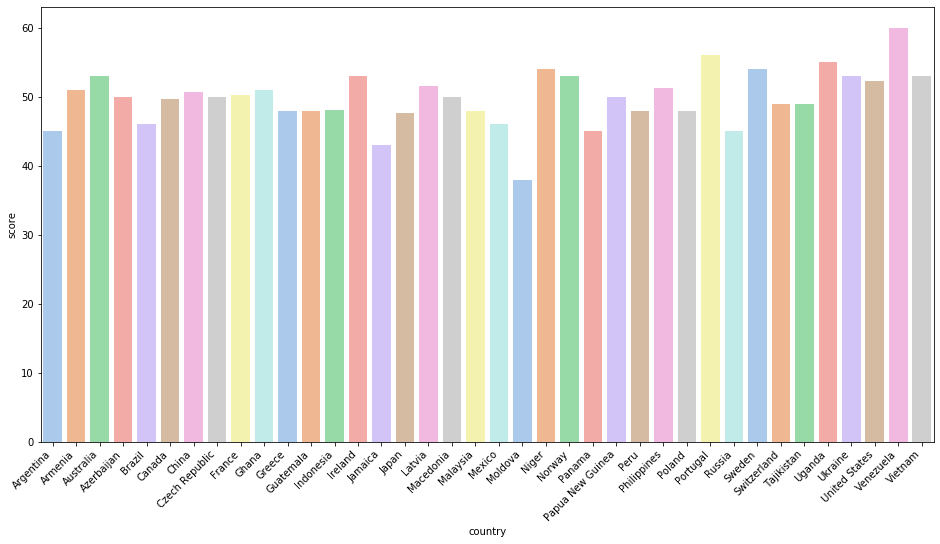

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plot = sns.barplot(x='country', y='score', palette="pastel", data=per_country_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

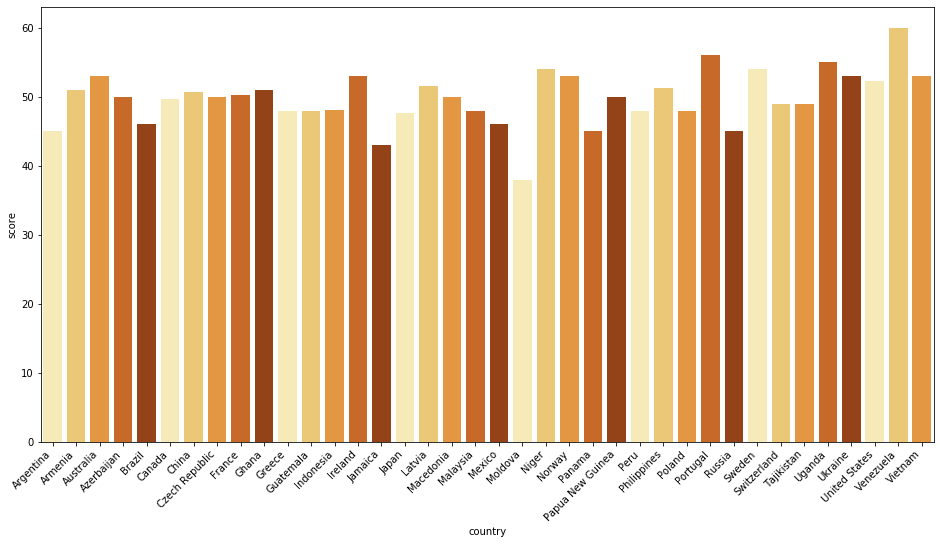

In [21]:
plt.figure(figsize=(16, 8))
plot = sns.barplot(x='country', y='score', palette=sns.color_palette("YlOrBr", n_colors=5), data=per_country_df)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [22]:
ibm_db.close(conn)

True